In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [84]:
df = pd.read_csv('apple_hs_data.csv',index_col='Date', parse_dates = True)

In [85]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2025-08-08,$229.35,113854000,$220.83,$231.00,$219.25
2025-08-07,$220.03,90224830,$218.875,$220.85,$216.58
2025-08-06,$213.25,108483100,$205.63,$215.38,$205.59
2025-08-05,$202.92,44155080,$203.40,$205.34,$202.16
2025-08-04,$203.35,75109300,$204.505,$207.88,$201.675


In [86]:
features = ['Open', 'High', 'Low', 'Close/Last', 'Volume']
scaler = MinMaxScaler()

In [87]:
df.head(), df.tail()

(           Close/Last     Volume      Open     High       Low
 Date                                                         
 2025-08-08    $229.35  113854000   $220.83  $231.00   $219.25
 2025-08-07    $220.03   90224830  $218.875  $220.85   $216.58
 2025-08-06    $213.25  108483100   $205.63  $215.38   $205.59
 2025-08-05    $202.92   44155080   $203.40  $205.34   $202.16
 2025-08-04    $203.35   75109300  $204.505  $207.88  $201.675,
            Close/Last     Volume      Open      High       Low
 Date                                                          
 2015-08-14     $28.99  171505480    $28.58  $29.0775  $28.5025
 2015-08-13   $28.7875  193630560    $29.01    $29.10   $28.635
 2015-08-12     $28.81  406373600  $28.1325   $28.855  $27.4075
 2015-08-11   $28.3725  387282680  $29.4525   $29.545  $28.3325
 2015-08-10     $29.93  219404040  $29.1325  $29.9975  $29.1325)

In [88]:
for col in ['Open', 'High', 'Low', 'Close/Last', 'Volume']:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


In [89]:
train_size = int(len(df) * 0.8)
train = df.iloc [:train_size]
test = df.iloc [train_size:]
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [90]:
scaled_train[:10]

array([[0.86723199, 0.22449962, 0.8318594 , 0.86989762, 0.8272183 ],
       [0.82552663, 0.16596087, 0.82306082, 0.82451826, 0.81519831],
       [0.79518733, 0.21119378, 0.76345102, 0.80006259, 0.76572277],
       [0.7489624 , 0.05182798, 0.75341479, 0.75517503, 0.75028137],
       [0.75088657, 0.12851376, 0.7583879 , 0.76653105, 0.74809796],
       [0.746546  , 0.20116381, 0.78701141, 0.79201502, 0.74731013],
       [0.76977033, 0.14236023, 0.7763226 , 0.77529396, 0.77279071],
       [0.77639307, 0.05519087, 0.79164698, 0.78669468, 0.77531175],
       [0.78632718, 0.06980553, 0.80190823, 0.7975142 , 0.78926755],
       [0.79876719, 0.03622769, 0.80125565, 0.79767068, 0.79935173]])

In [91]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [92]:
n_input = 90
n_features = 5
generator = TimeseriesGenerator(scaled_train, scaled_train[:, 3], length = n_input, batch_size=1)

In [93]:
X,y = generator[1]
print(f'Given: \n{X.flatten()}')
print(f'Prediction: \n{y}')

Given: 
[0.82552663 0.16596087 0.82306082 0.82451826 0.81519831 0.79518733
 0.21119378 0.76345102 0.80006259 0.76572277 0.7489624  0.05182798
 0.75341479 0.75517503 0.75028137 0.75088657 0.12851376 0.7583879
 0.76653105 0.74809796 0.746546   0.20116381 0.78701141 0.79201502
 0.74731013 0.76977033 0.14236023 0.7763226  0.77529396 0.77279071
 0.77639307 0.05519087 0.79164698 0.78669468 0.77531175 0.78632718
 0.06980553 0.80190823 0.7975142  0.78926755 0.79876719 0.03622769
 0.80125565 0.79767068 0.79935173 0.79800647 0.04220009 0.80427102
 0.79943667 0.80088237 0.79746949 0.05645461 0.80067058 0.80144856
 0.80146761 0.79921467 0.05884946 0.80562119 0.79903429 0.79642552
 0.80033337 0.05739962 0.79725016 0.79814012 0.79561563 0.79174171
 0.06972058 0.79256959 0.80185094 0.79291406 0.78592444 0.0637678
 0.78703391 0.78401216 0.78424571 0.78073365 0.06152217 0.78568375
 0.78405687 0.78373025 0.78136012 0.0600912  0.78444609 0.78673939
 0.77945347 0.77666156 0.04722315 0.779608   0.78445925 

In [94]:
X.shape

(1, 90, 5)

In [95]:
from tensorflow.keras import Sequential, Input
from keras.layers import Dense
from keras.layers import LSTM

In [96]:

model = Sequential()
model.add(Input(shape=(n_input, n_features)))  # define input here
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [97]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100)                 │          42,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,501 (166.02 KB)

 Trainable params: 42,501 (166.02 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
model.fit(generator, epochs=50)

Epoch 1/50


d:\python\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0052
Epoch 2/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 3.9962e-04
Epoch 3/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 2.5745e-04
Epoch 4/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 2.6011e-04
Epoch 5/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 1.8057e-04
Epoch 6/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 2.1813e-04
Epoch 7/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 1.5916e-04
Epoch 8/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 1.5326e-04
Epoch 9/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 1.5180e-04
Epoch 10/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 1.4529e-04
Epoch 11/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 1.5384e-04
Epoch 12/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 1.3238e-04
Epoch 13/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 1.5914e-04
Epoch 14/50
1922/1922 ━━━━━━━━━━━━━━━━━━━━

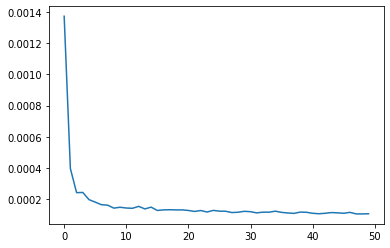

In [99]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [102]:
last_train_batch=scaled_train[-n_input:]

In [103]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [104]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([[0.01455068]], dtype=float32)

In [105]:
scaled_test[0]

array([0.01859289, 0.1587387 , 0.0147168 , 0.01475388, 0.0165106 ])

In [106]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

In [107]:
current_batch.shape

(1, 90, 5)

In [123]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch, verbose=0)[0][0]  # scalar prediction
    
    # Copy last timestep's features
    last_features = current_batch[0, -1, :].copy()
    last_features[3] = current_pred  # assuming 'close' is at index 3
    
    test_predictions.append(current_pred)
    
    # Append updated features to the sequence
    current_batch = np.append(
        current_batch[:, 1:, :],
        [[last_features]],
        axis=1
    )
    

In [124]:
test_predictions

[np.float32(0.014550678),
 np.float32(0.013766959),
 np.float32(0.01357881),
 np.float32(0.013476871),
 np.float32(0.013422407),
 np.float32(0.013391927),
 np.float32(0.0133744255),
 np.float32(0.013364129),
 np.float32(0.01335793),
 np.float32(0.013354138),
 np.float32(0.013351761),
 np.float32(0.013350248),
 np.float32(0.01334928),
 np.float32(0.013348639),
 np.float32(0.013348222),
 np.float32(0.013347954),
 np.float32(0.01334776),
 np.float32(0.013347648),
 np.float32(0.013347559),
 np.float32(0.0133475065),
 np.float32(0.013347462),
 np.float32(0.013347432),
 np.float32(0.013347417),
 np.float32(0.013347402),
 np.float32(0.013347402),
 np.float32(0.013347395),
 np.float32(0.013347395),
 np.float32(0.013347387),
 np.float32(0.013347387),
 np.float32(0.013347387),
 np.float32(0.013347387),
 np.float32(0.013347387),
 np.float32(0.013347387),
 np.float32(0.013347387),
 np.float32(0.013347387),
 np.float32(0.013347387),
 np.float32(0.013347387),
 np.float32(0.013347387),
 np.float32(0.

In [125]:
test.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2017-08-07,39.7025,87309600.0,39.2650,39.7300,39.1675
2017-08-04,39.0975,82059240.0,39.0175,39.3500,38.9225
2017-08-03,38.8925,106416560.0,39.2625,39.3025,38.7550
2017-08-02,39.2850,278905760.0,39.8200,39.9375,39.0400
2017-08-01,37.5125,134676080.0,37.2750,37.5550,37.1025
